In [53]:
from model import DiscriminativeModel
from trainer import Trainer
from experiments import SplitMNIST, SplitFashionMNIST, PermutedMNIST, PermutedFashionMNIST, Experiment
import acquisition_scores

import torch
import os
import typing

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm

In [54]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Permuted MNIST Dataset

In [3]:
INPUT_DIM = 784
N_TASKS = 10

In [39]:
permuted_datasets = PermutedMNIST(N_TASKS, INPUT_DIM)

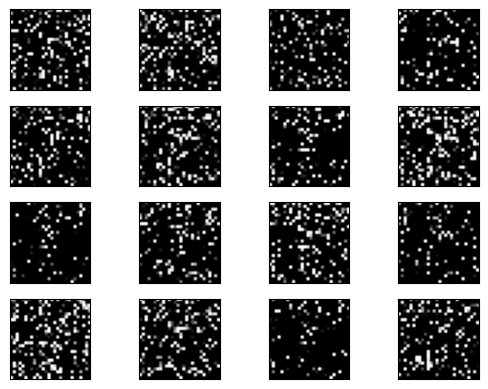

In [5]:
fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(permuted_datasets.dataset_train[0][i][0].reshape(28, 28).to('cpu'), cmap='Greys_r')

5


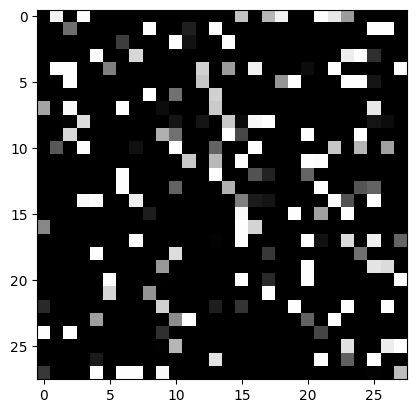

In [6]:
for elt in permuted_datasets.dataset_train[0]:
    plt.imshow(elt[0].reshape(28, 28), cmap='Greys_r')
    print(elt[1])
    break
plt.show()

In [40]:
LR = 1e-3
BATCH_SIZE = 256
CORESET_SIZE = 200

In [41]:
model = DiscriminativeModel()
model.to(device)

DiscriminativeModel(
  (layers): Sequential(
    (0): GaussianMeanFieldLayer()
    (1): ReLU()
    (2): GaussianMeanFieldLayer()
    (3): ReLU()
  )
  (heads): ModuleList(
    (0): GaussianMeanFieldLayer()
  )
  (softmax): Softmax(dim=-1)
  (log_softmax): LogSoftmax(dim=-1)
  (kl_div_loss): KLDivLoss()
)

In [42]:
permutation_experiment = Experiment(model,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=permuted_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=50,
                                    coreset_method='random',
                                    coreset_size=CORESET_SIZE,
                                    device=device)
accuracies = permutation_experiment.run(save_models=True)

Running experiment - With random coreset method - With 200 samples
Training task 0 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.88s/it]


Training Coreset
Step 0 - Task 0 - Accuracy 0.9821000099182129
Average accuracy 0.9821000099182129
Training task 1 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:45<00:00,  6.90s/it]


Training Coreset
Step 1 - Task 0 - Accuracy 0.9667999744415283
Step 1 - Task 1 - Accuracy 0.964900016784668
Average accuracy 0.9658499956130981
Training task 2 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:44<00:00,  6.89s/it]


Training Coreset
Step 2 - Task 0 - Accuracy 0.9523000121116638
Step 2 - Task 1 - Accuracy 0.9567000269889832
Step 2 - Task 2 - Accuracy 0.967199981212616
Average accuracy 0.958733320236206
Training task 3 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:36<00:00,  6.73s/it]


Training Coreset
Step 3 - Task 0 - Accuracy 0.9412000179290771
Step 3 - Task 1 - Accuracy 0.9466000199317932
Step 3 - Task 2 - Accuracy 0.9617999792098999
Step 3 - Task 3 - Accuracy 0.9677000045776367
Average accuracy 0.9543249607086182
Training task 4 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:40<00:00,  6.81s/it]


Training Coreset
Step 4 - Task 0 - Accuracy 0.9164999723434448
Step 4 - Task 1 - Accuracy 0.9370999932289124
Step 4 - Task 2 - Accuracy 0.9513999819755554
Step 4 - Task 3 - Accuracy 0.9641000032424927
Step 4 - Task 4 - Accuracy 0.9641000032424927
Average accuracy 0.9466400146484375
Training task 5 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:42<00:00,  6.85s/it]


Training Coreset
Step 5 - Task 0 - Accuracy 0.901199996471405
Step 5 - Task 1 - Accuracy 0.9244999885559082
Step 5 - Task 2 - Accuracy 0.9394999742507935
Step 5 - Task 3 - Accuracy 0.9556999802589417
Step 5 - Task 4 - Accuracy 0.9553999900817871
Step 5 - Task 5 - Accuracy 0.9616000056266785
Average accuracy 0.9396499991416931
Training task 6 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:42<00:00,  6.85s/it]


Training Coreset
Step 6 - Task 0 - Accuracy 0.8884000182151794
Step 6 - Task 1 - Accuracy 0.9129999876022339
Step 6 - Task 2 - Accuracy 0.9376999735832214
Step 6 - Task 3 - Accuracy 0.9462000131607056
Step 6 - Task 4 - Accuracy 0.9466000199317932
Step 6 - Task 5 - Accuracy 0.9545999765396118
Step 6 - Task 6 - Accuracy 0.9642000198364258
Average accuracy 0.9358142614364624
Training task 7 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:42<00:00,  6.86s/it]


Training Coreset
Step 7 - Task 0 - Accuracy 0.8787999749183655
Step 7 - Task 1 - Accuracy 0.9151999950408936
Step 7 - Task 2 - Accuracy 0.9277999997138977
Step 7 - Task 3 - Accuracy 0.9409999847412109
Step 7 - Task 4 - Accuracy 0.9348000288009644
Step 7 - Task 5 - Accuracy 0.9430000185966492
Step 7 - Task 6 - Accuracy 0.9559000134468079
Step 7 - Task 7 - Accuracy 0.9599000215530396
Average accuracy 0.9320499897003174
Training task 8 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:42<00:00,  6.85s/it]


Training Coreset
Step 8 - Task 0 - Accuracy 0.8658000230789185
Step 8 - Task 1 - Accuracy 0.9057999849319458
Step 8 - Task 2 - Accuracy 0.9138000011444092
Step 8 - Task 3 - Accuracy 0.9175999760627747
Step 8 - Task 4 - Accuracy 0.9211999773979187
Step 8 - Task 5 - Accuracy 0.928600013256073
Step 8 - Task 6 - Accuracy 0.9508000016212463
Step 8 - Task 7 - Accuracy 0.9509999752044678
Step 8 - Task 8 - Accuracy 0.9610999822616577
Average accuracy 0.923966646194458
Training task 9 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.88s/it]


Training Coreset
Step 9 - Task 0 - Accuracy 0.8040000200271606
Step 9 - Task 1 - Accuracy 0.8568999767303467
Step 9 - Task 2 - Accuracy 0.8952999711036682
Step 9 - Task 3 - Accuracy 0.8841999769210815
Step 9 - Task 4 - Accuracy 0.9070000052452087
Step 9 - Task 5 - Accuracy 0.8867999911308289
Step 9 - Task 6 - Accuracy 0.9337999820709229
Step 9 - Task 7 - Accuracy 0.9404000043869019
Step 9 - Task 8 - Accuracy 0.9538000226020813
Step 9 - Task 9 - Accuracy 0.9598000049591064
Average accuracy 0.9022000432014465


In [44]:
permuted_datasets = PermutedMNIST(N_TASKS, INPUT_DIM)
model = DiscriminativeModel()
model.to(device)
permutation_experiment = Experiment(model,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=permuted_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=50,
                                    coreset_method='random',
                                    coreset_size=CORESET_SIZE,
                                    device=device)
accuracies = permutation_experiment.run(save_models=True)
#torch.save(accuracies, 'results/permutedMNIST/experiment8/accuracies2.pt')

Running experiment - With random coreset method - With 200 samples
Training task 0 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.88s/it]


Training Coreset
Step 0 - Task 0 - Accuracy 0.9825999736785889
Average accuracy 0.9825999736785889
Training task 1 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:48<00:00,  6.96s/it]


Training Coreset
Step 1 - Task 0 - Accuracy 0.9649999737739563
Step 1 - Task 1 - Accuracy 0.9638000130653381
Average accuracy 0.9643999934196472
Training task 2 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:47<00:00,  6.95s/it]


Training Coreset
Step 2 - Task 0 - Accuracy 0.9517999887466431
Step 2 - Task 1 - Accuracy 0.9535999894142151
Step 2 - Task 2 - Accuracy 0.9646999835968018
Average accuracy 0.9567000269889832
Training task 3 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:39<00:00,  6.80s/it]


Training Coreset
Step 3 - Task 0 - Accuracy 0.9334999918937683
Step 3 - Task 1 - Accuracy 0.9459999799728394
Step 3 - Task 2 - Accuracy 0.9517999887466431
Step 3 - Task 3 - Accuracy 0.963699996471405
Average accuracy 0.9487499594688416
Training task 4 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:37<00:00,  6.75s/it]


Training Coreset
Step 4 - Task 0 - Accuracy 0.9275000095367432
Step 4 - Task 1 - Accuracy 0.9319999814033508
Step 4 - Task 2 - Accuracy 0.9401999711990356
Step 4 - Task 3 - Accuracy 0.9531999826431274
Step 4 - Task 4 - Accuracy 0.9660000205039978
Average accuracy 0.9437799453735352
Training task 5 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:42<00:00,  6.86s/it]


Training Coreset
Step 5 - Task 0 - Accuracy 0.9070000052452087
Step 5 - Task 1 - Accuracy 0.9261999726295471
Step 5 - Task 2 - Accuracy 0.9302999973297119
Step 5 - Task 3 - Accuracy 0.9359999895095825
Step 5 - Task 4 - Accuracy 0.9599999785423279
Step 5 - Task 5 - Accuracy 0.9628000259399414
Average accuracy 0.9370500445365906
Training task 6 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.87s/it]


Training Coreset
Step 6 - Task 0 - Accuracy 0.8809000253677368
Step 6 - Task 1 - Accuracy 0.9111999869346619
Step 6 - Task 2 - Accuracy 0.9108999967575073
Step 6 - Task 3 - Accuracy 0.9193999767303467
Step 6 - Task 4 - Accuracy 0.9550999999046326
Step 6 - Task 5 - Accuracy 0.9588000178337097
Step 6 - Task 6 - Accuracy 0.9641000032424927
Average accuracy 0.9286286234855652
Training task 7 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:40<00:00,  6.81s/it]


Training Coreset
Step 7 - Task 0 - Accuracy 0.8723999857902527
Step 7 - Task 1 - Accuracy 0.8896999955177307
Step 7 - Task 2 - Accuracy 0.9096999764442444
Step 7 - Task 3 - Accuracy 0.9115999937057495
Step 7 - Task 4 - Accuracy 0.9460999965667725
Step 7 - Task 5 - Accuracy 0.9487000107765198
Step 7 - Task 6 - Accuracy 0.9595999717712402
Step 7 - Task 7 - Accuracy 0.9635000228881836
Average accuracy 0.9251624941825867
Training task 8 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.76s/it]


Training Coreset
Step 8 - Task 0 - Accuracy 0.8633000254631042
Step 8 - Task 1 - Accuracy 0.8720999956130981
Step 8 - Task 2 - Accuracy 0.8935999870300293
Step 8 - Task 3 - Accuracy 0.8960000276565552
Step 8 - Task 4 - Accuracy 0.9472000002861023
Step 8 - Task 5 - Accuracy 0.9397000074386597
Step 8 - Task 6 - Accuracy 0.9502999782562256
Step 8 - Task 7 - Accuracy 0.9577000141143799
Step 8 - Task 8 - Accuracy 0.9627000093460083
Average accuracy 0.9202888011932373
Training task 9 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:37<00:00,  6.75s/it]


Training Coreset
Step 9 - Task 0 - Accuracy 0.8464999794960022
Step 9 - Task 1 - Accuracy 0.8561999797821045
Step 9 - Task 2 - Accuracy 0.8737000226974487
Step 9 - Task 3 - Accuracy 0.8888000249862671
Step 9 - Task 4 - Accuracy 0.9312000274658203
Step 9 - Task 5 - Accuracy 0.925000011920929
Step 9 - Task 6 - Accuracy 0.9312999844551086
Step 9 - Task 7 - Accuracy 0.947700023651123
Step 9 - Task 8 - Accuracy 0.9591000080108643
Step 9 - Task 9 - Accuracy 0.9596999883651733
Average accuracy 0.9119199514389038


In [46]:
permuted_datasets = PermutedFashionMNIST(N_TASKS, INPUT_DIM)
model = DiscriminativeModel()
model.to(device)
permutation_experiment = Experiment(model,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=permuted_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=50,
                                    coreset_method='random',
                                    coreset_size=CORESET_SIZE,
                                    device=device)
accuracies = permutation_experiment.run(save_models=True)
#torch.save(accuracies, 'results/permutedFashionMNIST/experiment4/accuracies.pt')

Running experiment - With random coreset method - With 200 samples
Training task 0 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.77s/it]


Training Coreset
Step 0 - Task 0 - Accuracy 0.878600001335144
Average accuracy 0.878600001335144
Training task 1 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.88s/it]


Training Coreset
Step 1 - Task 0 - Accuracy 0.8654999732971191
Step 1 - Task 1 - Accuracy 0.8428000211715698
Average accuracy 0.8541499972343445
Training task 2 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.87s/it]


Training Coreset
Step 2 - Task 0 - Accuracy 0.8366000056266785
Step 2 - Task 1 - Accuracy 0.8167999982833862
Step 2 - Task 2 - Accuracy 0.8406999707221985
Average accuracy 0.8313665986061096
Training task 3 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:44<00:00,  6.89s/it]


Training Coreset
Step 3 - Task 0 - Accuracy 0.8155999779701233
Step 3 - Task 1 - Accuracy 0.8144999742507935
Step 3 - Task 2 - Accuracy 0.8209999799728394
Step 3 - Task 3 - Accuracy 0.8400999903678894
Average accuracy 0.8227999806404114
Training task 4 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.87s/it]


Training Coreset
Step 4 - Task 0 - Accuracy 0.7778000235557556
Step 4 - Task 1 - Accuracy 0.7914000153541565
Step 4 - Task 2 - Accuracy 0.8129000067710876
Step 4 - Task 3 - Accuracy 0.8328999876976013
Step 4 - Task 4 - Accuracy 0.8392000198364258
Average accuracy 0.8108400106430054
Training task 5 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:44<00:00,  6.90s/it]


Training Coreset
Step 5 - Task 0 - Accuracy 0.7824000120162964
Step 5 - Task 1 - Accuracy 0.7682999968528748
Step 5 - Task 2 - Accuracy 0.8040000200271606
Step 5 - Task 3 - Accuracy 0.8123000264167786
Step 5 - Task 4 - Accuracy 0.8116000294685364
Step 5 - Task 5 - Accuracy 0.8396999835968018
Average accuracy 0.8030500411987305
Training task 6 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:43<00:00,  6.87s/it]


Training Coreset
Step 6 - Task 0 - Accuracy 0.7497000098228455
Step 6 - Task 1 - Accuracy 0.7480999827384949
Step 6 - Task 2 - Accuracy 0.7756999731063843
Step 6 - Task 3 - Accuracy 0.7983999848365784
Step 6 - Task 4 - Accuracy 0.7925000190734863
Step 6 - Task 5 - Accuracy 0.8263000249862671
Step 6 - Task 6 - Accuracy 0.8296999931335449
Average accuracy 0.7886285781860352
Training task 7 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:37<00:00,  6.76s/it]


Training Coreset
Step 7 - Task 0 - Accuracy 0.7285000085830688
Step 7 - Task 1 - Accuracy 0.6735000014305115
Step 7 - Task 2 - Accuracy 0.7404999732971191
Step 7 - Task 3 - Accuracy 0.7914999723434448
Step 7 - Task 4 - Accuracy 0.765999972820282
Step 7 - Task 5 - Accuracy 0.7644000053405762
Step 7 - Task 6 - Accuracy 0.8046000003814697
Step 7 - Task 7 - Accuracy 0.8331999778747559
Average accuracy 0.7627750039100647
Training task 8 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:35<00:00,  6.72s/it]


Training Coreset
Step 8 - Task 0 - Accuracy 0.704200029373169
Step 8 - Task 1 - Accuracy 0.6718000173568726
Step 8 - Task 2 - Accuracy 0.7319999933242798
Step 8 - Task 3 - Accuracy 0.7282000184059143
Step 8 - Task 4 - Accuracy 0.7425000071525574
Step 8 - Task 5 - Accuracy 0.7398999929428101
Step 8 - Task 6 - Accuracy 0.7411999702453613
Step 8 - Task 7 - Accuracy 0.8203999996185303
Step 8 - Task 8 - Accuracy 0.8263000249862671
Average accuracy 0.7451666593551636
Training task 9 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:37<00:00,  6.75s/it]


Training Coreset
Step 9 - Task 0 - Accuracy 0.6725999712944031
Step 9 - Task 1 - Accuracy 0.6873999834060669
Step 9 - Task 2 - Accuracy 0.6833999752998352
Step 9 - Task 3 - Accuracy 0.6531000137329102
Step 9 - Task 4 - Accuracy 0.6970999836921692
Step 9 - Task 5 - Accuracy 0.7402999997138977
Step 9 - Task 6 - Accuracy 0.7343999743461609
Step 9 - Task 7 - Accuracy 0.7699999809265137
Step 9 - Task 8 - Accuracy 0.7495999932289124
Step 9 - Task 9 - Accuracy 0.8282999992370605
Average accuracy 0.7216199636459351


In [48]:
permuted_datasets = PermutedFashionMNIST(N_TASKS, INPUT_DIM)
model = DiscriminativeModel()
model.to(device)
permutation_experiment = Experiment(model,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=permuted_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=50,
                                    coreset_method='random',
                                    coreset_size=CORESET_SIZE,
                                    device=device)
accuracies = permutation_experiment.run(save_models=True)
#torch.save(accuracies, 'results/permutedFashionMNIST/experiment4/accuracies3.pt')

Running experiment - With random coreset method - With 200 samples
Training task 0 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:39<00:00,  6.78s/it]


Training Coreset
Step 0 - Task 0 - Accuracy 0.8810999989509583
Average accuracy 0.8810999989509583
Training task 1 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:37<00:00,  6.76s/it]


Training Coreset
Step 1 - Task 0 - Accuracy 0.8608999848365784
Step 1 - Task 1 - Accuracy 0.8364999890327454
Average accuracy 0.8486999869346619
Training task 2 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:35<00:00,  6.71s/it]


Training Coreset
Step 2 - Task 0 - Accuracy 0.8471999764442444
Step 2 - Task 1 - Accuracy 0.8179000020027161
Step 2 - Task 2 - Accuracy 0.8331000208854675
Average accuracy 0.8327333331108093
Training task 3 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:36<00:00,  6.73s/it]


Training Coreset
Step 3 - Task 0 - Accuracy 0.8259999752044678
Step 3 - Task 1 - Accuracy 0.8086000084877014
Step 3 - Task 2 - Accuracy 0.8169999718666077
Step 3 - Task 3 - Accuracy 0.8435999751091003
Average accuracy 0.8237999677658081
Training task 4 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:37<00:00,  6.75s/it]


Training Coreset
Step 4 - Task 0 - Accuracy 0.8156999945640564
Step 4 - Task 1 - Accuracy 0.8130000233650208
Step 4 - Task 2 - Accuracy 0.7612000107765198
Step 4 - Task 3 - Accuracy 0.8248000144958496
Step 4 - Task 4 - Accuracy 0.8421000242233276
Average accuracy 0.8113600015640259
Training task 5 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:35<00:00,  6.70s/it]


Training Coreset
Step 5 - Task 0 - Accuracy 0.8095999956130981
Step 5 - Task 1 - Accuracy 0.8001999855041504
Step 5 - Task 2 - Accuracy 0.7487999796867371
Step 5 - Task 3 - Accuracy 0.7864999771118164
Step 5 - Task 4 - Accuracy 0.8055999875068665
Step 5 - Task 5 - Accuracy 0.8343999981880188
Average accuracy 0.7975166440010071
Training task 6 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.77s/it]


Training Coreset
Step 6 - Task 0 - Accuracy 0.8034999966621399
Step 6 - Task 1 - Accuracy 0.7857000231742859
Step 6 - Task 2 - Accuracy 0.7305999994277954
Step 6 - Task 3 - Accuracy 0.7754999995231628
Step 6 - Task 4 - Accuracy 0.7757999897003174
Step 6 - Task 5 - Accuracy 0.8087999820709229
Step 6 - Task 6 - Accuracy 0.8331999778747559
Average accuracy 0.7875856757164001
Training task 7 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:47<00:00,  6.95s/it]


Training Coreset
Step 7 - Task 0 - Accuracy 0.7814000248908997
Step 7 - Task 1 - Accuracy 0.7279000282287598
Step 7 - Task 2 - Accuracy 0.7148000001907349
Step 7 - Task 3 - Accuracy 0.7246999740600586
Step 7 - Task 4 - Accuracy 0.777400016784668
Step 7 - Task 5 - Accuracy 0.7750999927520752
Step 7 - Task 6 - Accuracy 0.8126999735832214
Step 7 - Task 7 - Accuracy 0.8335999846458435
Average accuracy 0.7684499621391296
Training task 8 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:35<00:00,  6.72s/it]


Training Coreset
Step 8 - Task 0 - Accuracy 0.765999972820282
Step 8 - Task 1 - Accuracy 0.6711999773979187
Step 8 - Task 2 - Accuracy 0.6791999936103821
Step 8 - Task 3 - Accuracy 0.6693000197410583
Step 8 - Task 4 - Accuracy 0.7724999785423279
Step 8 - Task 5 - Accuracy 0.7014999985694885
Step 8 - Task 6 - Accuracy 0.7487000226974487
Step 8 - Task 7 - Accuracy 0.8026999831199646
Step 8 - Task 8 - Accuracy 0.8310999870300293
Average accuracy 0.7380222082138062
Training task 9 - 59800 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:36<00:00,  6.74s/it]


Training Coreset
Step 9 - Task 0 - Accuracy 0.7258999943733215
Step 9 - Task 1 - Accuracy 0.6432999968528748
Step 9 - Task 2 - Accuracy 0.6137999892234802
Step 9 - Task 3 - Accuracy 0.6161999702453613
Step 9 - Task 4 - Accuracy 0.7129999995231628
Step 9 - Task 5 - Accuracy 0.7116000056266785
Step 9 - Task 6 - Accuracy 0.7218000292778015
Step 9 - Task 7 - Accuracy 0.7925999760627747
Step 9 - Task 8 - Accuracy 0.798799991607666
Step 9 - Task 9 - Accuracy 0.8259999752044678
Average accuracy 0.7162999510765076


In [52]:
permuted_datasets = PermutedFashionMNIST(N_TASKS, INPUT_DIM)
model = DiscriminativeModel()
model.to(device)
permutation_experiment = Experiment(model,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=permuted_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=50,
                                    coreset_method=None,
                                    coreset_size=CORESET_SIZE,
                                    device=device)
accuracies = permutation_experiment.run(save_models=True)
#torch.save(accuracies, f'results/permutedFashionMNIST/experiment6/acc_none3.pt')
permutation_experiment.coreset.coreset_method = 'random'
acc = permutation_experiment.finetuning(permutation_experiment.saved_models)
#torch.save(acc, f'results/permutedFashionMNIST/experiment6/acc_random3.pt')
permutation_experiment.coreset.coreset_method = 'importance'
permutation_experiment.coreset.importance_sampler.acquisition_function = acquisition_scores.mutual_information
permutation_experiment.coreset.importance_sampler.temperature=10
permutation_experiment.coreset.importance_sampler.proposal='softmax'
acc = permutation_experiment.finetuning(permutation_experiment.saved_models)
#torch.save(acc, f'results/permutedFashionMNIST/experiment6/acc_mi3.pt')

Running experiment - With None coreset method - With 200 samples
Training task 0 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.77s/it]


Step 0 - Task 0 - Accuracy 0.8824999928474426
Average accuracy 0.8824999928474426
Training task 1 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:44<00:00,  6.90s/it]


Step 1 - Task 0 - Accuracy 0.8421000242233276
Step 1 - Task 1 - Accuracy 0.8465999960899353
Average accuracy 0.8443499803543091
Training task 2 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:39<00:00,  6.78s/it]


Step 2 - Task 0 - Accuracy 0.7900999784469604
Step 2 - Task 1 - Accuracy 0.8156999945640564
Step 2 - Task 2 - Accuracy 0.8435999751091003
Average accuracy 0.8164666295051575
Training task 3 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.76s/it]


Step 3 - Task 0 - Accuracy 0.7789999842643738
Step 3 - Task 1 - Accuracy 0.8044000267982483
Step 3 - Task 2 - Accuracy 0.8205999732017517
Step 3 - Task 3 - Accuracy 0.8450999855995178
Average accuracy 0.8122749924659729
Training task 4 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:36<00:00,  6.73s/it]


Step 4 - Task 0 - Accuracy 0.7260000109672546
Step 4 - Task 1 - Accuracy 0.7368999719619751
Step 4 - Task 2 - Accuracy 0.7642999887466431
Step 4 - Task 3 - Accuracy 0.7939000129699707
Step 4 - Task 4 - Accuracy 0.842199981212616
Average accuracy 0.772659957408905
Training task 5 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:40<00:00,  6.80s/it]


Step 5 - Task 0 - Accuracy 0.6930000185966492
Step 5 - Task 1 - Accuracy 0.6373000144958496
Step 5 - Task 2 - Accuracy 0.7491999864578247
Step 5 - Task 3 - Accuracy 0.7365000247955322
Step 5 - Task 4 - Accuracy 0.8123000264167786
Step 5 - Task 5 - Accuracy 0.8474000096321106
Average accuracy 0.7459500432014465
Training task 6 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:49<00:00,  6.99s/it]


Step 6 - Task 0 - Accuracy 0.6773999929428101
Step 6 - Task 1 - Accuracy 0.6470000147819519
Step 6 - Task 2 - Accuracy 0.7498999834060669
Step 6 - Task 3 - Accuracy 0.6990000009536743
Step 6 - Task 4 - Accuracy 0.7908999919891357
Step 6 - Task 5 - Accuracy 0.8212000131607056
Step 6 - Task 6 - Accuracy 0.8374000191688538
Average accuracy 0.7461142539978027
Training task 7 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:46<00:00,  6.93s/it]


Step 7 - Task 0 - Accuracy 0.675599992275238
Step 7 - Task 1 - Accuracy 0.6220999956130981
Step 7 - Task 2 - Accuracy 0.714900016784668
Step 7 - Task 3 - Accuracy 0.6773999929428101
Step 7 - Task 4 - Accuracy 0.6636000275611877
Step 7 - Task 5 - Accuracy 0.6974999904632568
Step 7 - Task 6 - Accuracy 0.737500011920929
Step 7 - Task 7 - Accuracy 0.8371000289916992
Average accuracy 0.7032124996185303
Training task 8 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.78s/it]


Step 8 - Task 0 - Accuracy 0.703000009059906
Step 8 - Task 1 - Accuracy 0.6000000238418579
Step 8 - Task 2 - Accuracy 0.7245000004768372
Step 8 - Task 3 - Accuracy 0.6894000172615051
Step 8 - Task 4 - Accuracy 0.6481999754905701
Step 8 - Task 5 - Accuracy 0.7204999923706055
Step 8 - Task 6 - Accuracy 0.6988000273704529
Step 8 - Task 7 - Accuracy 0.7548999786376953
Step 8 - Task 8 - Accuracy 0.839900016784668
Average accuracy 0.7088000178337097
Training task 9 - 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [05:38<00:00,  6.77s/it]


Step 9 - Task 0 - Accuracy 0.6976000070571899
Step 9 - Task 1 - Accuracy 0.5612000226974487
Step 9 - Task 2 - Accuracy 0.6722000241279602
Step 9 - Task 3 - Accuracy 0.5785999894142151
Step 9 - Task 4 - Accuracy 0.5600000023841858
Step 9 - Task 5 - Accuracy 0.5701000094413757
Step 9 - Task 6 - Accuracy 0.6186000108718872
Step 9 - Task 7 - Accuracy 0.7177000045776367
Step 9 - Task 8 - Accuracy 0.7692999839782715
Step 9 - Task 9 - Accuracy 0.8361999988555908
Average accuracy 0.6581500172615051
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset


In [19]:
LR = 1e-3
BATCH_SIZE = 256
EPOCHS = 120
CORESET_SIZE = 40
N_TASKS = 5

In [20]:
model_ = DiscriminativeModel(output_dim=2)
model_.to(device)

DiscriminativeModel(
  (layers): Sequential(
    (0): GaussianMeanFieldLayer()
    (1): ReLU()
    (2): GaussianMeanFieldLayer()
    (3): ReLU()
  )
  (heads): ModuleList(
    (0): GaussianMeanFieldLayer()
  )
  (softmax): Softmax(dim=-1)
  (log_softmax): LogSoftmax(dim=-1)
  (kl_div_loss): KLDivLoss()
)

In [21]:
permutation_experiment = Experiment(model_,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=split_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=10,
                                    all_previous_coresets=False,
                                    device=device)
accuracies = permutation_experiment.run()

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 44.61it/s]


Step 0 - Task 0 - Accuracy 0.9995271563529968


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.57it/s]


Step 1 - Task 0 - Accuracy 0.92955082654953
Step 1 - Task 1 - Accuracy 0.973555326461792


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.12it/s]


Step 2 - Task 0 - Accuracy 0.270449161529541
Step 2 - Task 1 - Accuracy 0.8609206676483154
Step 2 - Task 2 - Accuracy 0.9839914441108704


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 27.46it/s]


Step 3 - Task 0 - Accuracy 0.7172576785087585
Step 3 - Task 1 - Accuracy 0.834965705871582
Step 3 - Task 2 - Accuracy 0.7465314865112305
Step 3 - Task 3 - Accuracy 0.9929506778717041


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 26.51it/s]


Step 4 - Task 0 - Accuracy 0.4198581576347351
Step 4 - Task 1 - Accuracy 0.6111655235290527
Step 4 - Task 2 - Accuracy 0.1734258234500885
Step 4 - Task 3 - Accuracy 0.9335347414016724
Step 4 - Task 4 - Accuracy 0.9823499917984009


## Permuted Fashion MNIST Dataset

In [24]:
INPUT_DIM = 784
N_TASKS = 10

In [33]:
permuted_datasets = PermutedFashionMNIST(N_TASKS, INPUT_DIM)

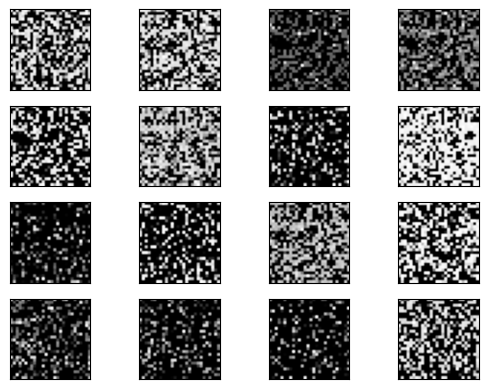

In [5]:
fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(permuted_datasets.dataset_train[0][i][0].reshape(28, 28).to('cpu'), cmap='Greys_r')

In [26]:
LR = 1e-3
BATCH_SIZE = 256
EPOCHS = 20
CORESET_SIZE = 200

In [34]:
model = DiscriminativeModel()
model.to(device)

DiscriminativeModel(
  (layers): Sequential(
    (0): GaussianMeanFieldLayer()
    (1): ReLU()
    (2): GaussianMeanFieldLayer()
    (3): ReLU()
  )
  (heads): ModuleList(
    (0): GaussianMeanFieldLayer()
  )
  (softmax): Softmax(dim=-1)
  (log_softmax): LogSoftmax(dim=-1)
  (kl_div_loss): KLDivLoss()
)

In [7]:
permutation_experiment = Experiment(model,
                                    n_tasks=N_TASKS,
                                    heads=[0]*N_TASKS,
                                    datasets=permuted_datasets,
                                    lr=LR,
                                    batch_size=BATCH_SIZE,
                                    n_epochs=20,
                                    coreset_method='random',
                                    coreset_size=200,
                                    device=device)
accuracies = permutation_experiment.run()

Running experiment - With random coreset method - With 200 samples
Training task 0 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [03:58<00:00, 11.93s/it]


Training Coreset
Step 0 - Task 0 - Accuracy 0.8827000260353088
Average accuracy 0.8827000260353088
Training task 1 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:12<00:00, 12.63s/it]


Training Coreset
Step 1 - Task 0 - Accuracy 0.871999979019165
Step 1 - Task 1 - Accuracy 0.8388000130653381
Average accuracy 0.8553999662399292
Training task 2 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:12<00:00, 12.63s/it]


Training Coreset
Step 2 - Task 0 - Accuracy 0.862500011920929
Step 2 - Task 1 - Accuracy 0.8187000155448914
Step 2 - Task 2 - Accuracy 0.8378999829292297
Average accuracy 0.8396999835968018
Training task 3 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [03:41<00:00, 11.09s/it]


Training Coreset
Step 3 - Task 0 - Accuracy 0.8335999846458435
Step 3 - Task 1 - Accuracy 0.8144000172615051
Step 3 - Task 2 - Accuracy 0.833299994468689
Step 3 - Task 3 - Accuracy 0.8422999978065491
Average accuracy 0.8308999538421631
Training task 4 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:10<00:00, 12.55s/it]


Training Coreset
Step 4 - Task 0 - Accuracy 0.8123999834060669
Step 4 - Task 1 - Accuracy 0.7831000089645386
Step 4 - Task 2 - Accuracy 0.8082000017166138
Step 4 - Task 3 - Accuracy 0.817300021648407
Step 4 - Task 4 - Accuracy 0.8389999866485596
Average accuracy 0.8119999766349792
Training task 5 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:12<00:00, 12.64s/it]


Training Coreset
Step 5 - Task 0 - Accuracy 0.8025000095367432
Step 5 - Task 1 - Accuracy 0.7559000253677368
Step 5 - Task 2 - Accuracy 0.7964000105857849
Step 5 - Task 3 - Accuracy 0.7878999710083008
Step 5 - Task 4 - Accuracy 0.8027999997138977
Step 5 - Task 5 - Accuracy 0.8393999934196472
Average accuracy 0.7974833846092224
Training task 6 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:10<00:00, 12.53s/it]


Training Coreset
Step 6 - Task 0 - Accuracy 0.7820000052452087
Step 6 - Task 1 - Accuracy 0.7469000220298767
Step 6 - Task 2 - Accuracy 0.8046000003814697
Step 6 - Task 3 - Accuracy 0.7796000242233276
Step 6 - Task 4 - Accuracy 0.7896999716758728
Step 6 - Task 5 - Accuracy 0.8241999745368958
Step 6 - Task 6 - Accuracy 0.8407999873161316
Average accuracy 0.795400083065033
Training task 7 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:11<00:00, 12.56s/it]


Training Coreset
Step 7 - Task 0 - Accuracy 0.7573000192642212
Step 7 - Task 1 - Accuracy 0.7164000272750854
Step 7 - Task 2 - Accuracy 0.7878999710083008
Step 7 - Task 3 - Accuracy 0.7745000123977661
Step 7 - Task 4 - Accuracy 0.7639999985694885
Step 7 - Task 5 - Accuracy 0.7858999967575073
Step 7 - Task 6 - Accuracy 0.824999988079071
Step 7 - Task 7 - Accuracy 0.8353000283241272
Average accuracy 0.780787467956543
Training task 8 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [04:11<00:00, 12.59s/it]


Training Coreset
Step 8 - Task 0 - Accuracy 0.7605999708175659
Step 8 - Task 1 - Accuracy 0.7150999903678894
Step 8 - Task 2 - Accuracy 0.7692999839782715
Step 8 - Task 3 - Accuracy 0.766700029373169
Step 8 - Task 4 - Accuracy 0.7529000043869019
Step 8 - Task 5 - Accuracy 0.7967000007629395
Step 8 - Task 6 - Accuracy 0.8026999831199646
Step 8 - Task 7 - Accuracy 0.7949000000953674
Step 8 - Task 8 - Accuracy 0.8342000246047974
Average accuracy 0.7770111560821533
Training task 9 - 59800 samples


100%|███████████████████████████████████████████████████████████████████████████████| 20/20 [03:32<00:00, 10.63s/it]


Training Coreset
Step 9 - Task 0 - Accuracy 0.7526000142097473
Step 9 - Task 1 - Accuracy 0.710099995136261
Step 9 - Task 2 - Accuracy 0.7312999963760376
Step 9 - Task 3 - Accuracy 0.7675999999046326
Step 9 - Task 4 - Accuracy 0.7592999935150146
Step 9 - Task 5 - Accuracy 0.7423999905586243
Step 9 - Task 6 - Accuracy 0.7953000068664551
Step 9 - Task 7 - Accuracy 0.8030999898910522
Step 9 - Task 8 - Accuracy 0.7759000062942505
Step 9 - Task 9 - Accuracy 0.8385000228881836
Average accuracy 0.7676100730895996


## Split MNIST experiments

In [55]:
INPUT_DIM = 784
N_TASKS = 5

In [102]:
split_datasets = SplitMNIST(N_TASKS)

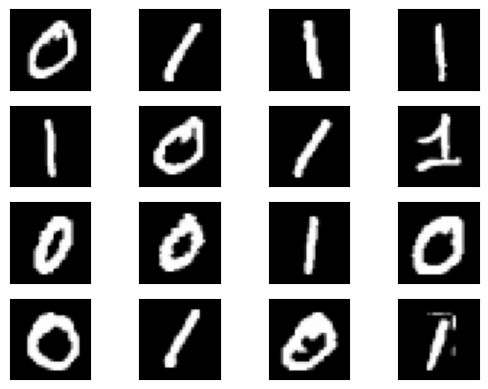

In [6]:
fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(split_datasets.dataset_train[0][i][0].reshape(28, 28).to('cpu'), cmap='Greys_r')

In [18]:
model = DiscriminativeModel(output_dim=2, n_heads=len(HEADS), initial_sigma=1e-6)
model.to(device)
split_experiment = Experiment(model,
                            n_tasks=N_TASKS,
                            heads=HEADS,
                            datasets=split_datasets,
                            lr=LR,
                            batch_size=BATCH_SIZE,
                            coreset_method='random',
                            coreset_size=CORESET_SIZE,
                            n_epochs=10,
                            device=device)
accuracies = split_experiment.run()
torch.save(accuracies, 'results/splitMNIST/experiment2/accuracies.pt')
torch.save(model.state_dict(), 'results/splitMNIST/experiment2/model.pt')

Running experiment - With random coreset method - With 40 samples
Training task 0 - 12625 samples


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:36<00:00,  3.70s/it]


Training Coreset
Step 0 - Task 0 - Accuracy 0.9995272159576416
Average accuracy 0.9995272159576416
Training task 1 - 12049 samples


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.53s/it]


Training Coreset
Step 1 - Task 0 - Accuracy 0.9995272159576416
Step 1 - Task 1 - Accuracy 0.9250734448432922
Average accuracy 0.9623003005981445
Training task 2 - 11223 samples


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:32<00:00,  3.24s/it]


Training Coreset
Step 2 - Task 0 - Accuracy 0.9995272159576416
Step 2 - Task 1 - Accuracy 0.9231145977973938
Step 2 - Task 2 - Accuracy 0.9551761150360107
Average accuracy 0.9592726230621338
Training task 3 - 12143 samples


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:35<00:00,  3.53s/it]


Training Coreset
Step 3 - Task 0 - Accuracy 0.9995272159576416
Step 3 - Task 1 - Accuracy 0.9211557507514954
Step 3 - Task 2 - Accuracy 0.9551761150360107
Step 3 - Task 3 - Accuracy 0.9718025922775269
Average accuracy 0.9619153738021851
Training task 4 - 11760 samples


100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:33<00:00,  3.39s/it]


Training Coreset
Step 4 - Task 0 - Accuracy 0.9995272159576416
Step 4 - Task 1 - Accuracy 0.9206660389900208
Step 4 - Task 2 - Accuracy 0.9541088342666626
Step 4 - Task 3 - Accuracy 0.9733132123947144
Step 4 - Task 4 - Accuracy 0.9278870224952698
Average accuracy 0.955100417137146


## Split FashionMNIST experiments

In [116]:
INPUT_DIM = 784
N_TASKS = 5

In [117]:
fashionsplit_datasets = SplitFashionMNIST(N_TASKS)

In [118]:
LR = 1e-3
BATCH_SIZE = 256
CORESET_SIZE = 40
N_TASKS = 5
HEADS = [k for k in range(N_TASKS)]

In [119]:
model = DiscriminativeModel(output_dim=2, n_heads=len(HEADS), initial_sigma=1e-6)
model.to(device)

DiscriminativeModel(
  (layers): Sequential(
    (0): GaussianMeanFieldLayer()
    (1): ReLU()
    (2): GaussianMeanFieldLayer()
    (3): ReLU()
  )
  (heads): ModuleList(
    (0-4): 5 x GaussianMeanFieldLayer()
  )
  (softmax): Softmax(dim=-1)
  (log_softmax): LogSoftmax(dim=-1)
  (kl_div_loss): KLDivLoss()
)

In [120]:
split_experiment = Experiment(model,
                            n_tasks=N_TASKS,
                            heads=HEADS,
                            datasets=fashionsplit_datasets,
                            lr=LR,
                            batch_size=BATCH_SIZE,
                            coreset_method=None,
                            coreset_size=CORESET_SIZE,
                            n_epochs=20,
                            device=device)
accuracies = split_experiment.run(save_models=True)

Running experiment - With None coreset method - With 40 samples
Training task 0 - 12000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.14s/it]


Step 0 - Task 0 - Accuracy 0.9929999709129333
Average accuracy 0.9929999709129333
Training task 1 - 12000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.14s/it]


Step 1 - Task 0 - Accuracy 0.9929999709129333
Step 1 - Task 1 - Accuracy 0.9524999856948853
Average accuracy 0.9727499485015869
Training task 2 - 12000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.14s/it]


Step 2 - Task 0 - Accuracy 0.9929999709129333
Step 2 - Task 1 - Accuracy 0.9524999856948853
Step 2 - Task 2 - Accuracy 0.9909999966621399
Average accuracy 0.9788332581520081
Training task 3 - 12000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:43<00:00,  2.15s/it]


Step 3 - Task 0 - Accuracy 0.9929999709129333
Step 3 - Task 1 - Accuracy 0.953499972820282
Step 3 - Task 2 - Accuracy 0.9909999966621399
Step 3 - Task 3 - Accuracy 0.9959999918937683
Average accuracy 0.9833750128746033
Training task 4 - 12000 samples


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:42<00:00,  2.13s/it]


Step 4 - Task 0 - Accuracy 0.9929999709129333
Step 4 - Task 1 - Accuracy 0.949999988079071
Step 4 - Task 2 - Accuracy 0.9909999966621399
Step 4 - Task 3 - Accuracy 0.9959999918937683
Step 4 - Task 4 - Accuracy 0.9934999942779541
Average accuracy 0.9847000241279602


In [121]:
torch.save(accuracies, f'results/splitFashionMNIST/experiment8/acc_none1.pt')
split_experiment.coreset.coreset_method = 'random'
acc = split_experiment.finetuning(split_experiment.saved_models)
torch.save(acc, f'results/splitFashionMNIST/experiment8/acc_random1.pt')
split_experiment.coreset.coreset_method = 'importance'
split_experiment.coreset.importance_sampler.acquisition_function = acquisition_scores.mutual_information
split_experiment.coreset.importance_sampler.temperature=10
split_experiment.coreset.importance_sampler.proposal='softmax'
acc = split_experiment.finetuning(split_experiment.saved_models)
torch.save(acc, f'results/splitFashionMNIST/experiment8/acc_mi1.pt')

Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
Training Coreset
